In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.16.1'

In [3]:
img_height,img_width=32,32
batch_size=20

train_ds=tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size=(img_height,img_width),
    batch_size=batch_size)

test_ds=tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

val_ds=tf.keras.utils.image_dataset_from_directory(
    "validation",
    image_size=(img_height,img_width),
    batch_size=batch_size
)


Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


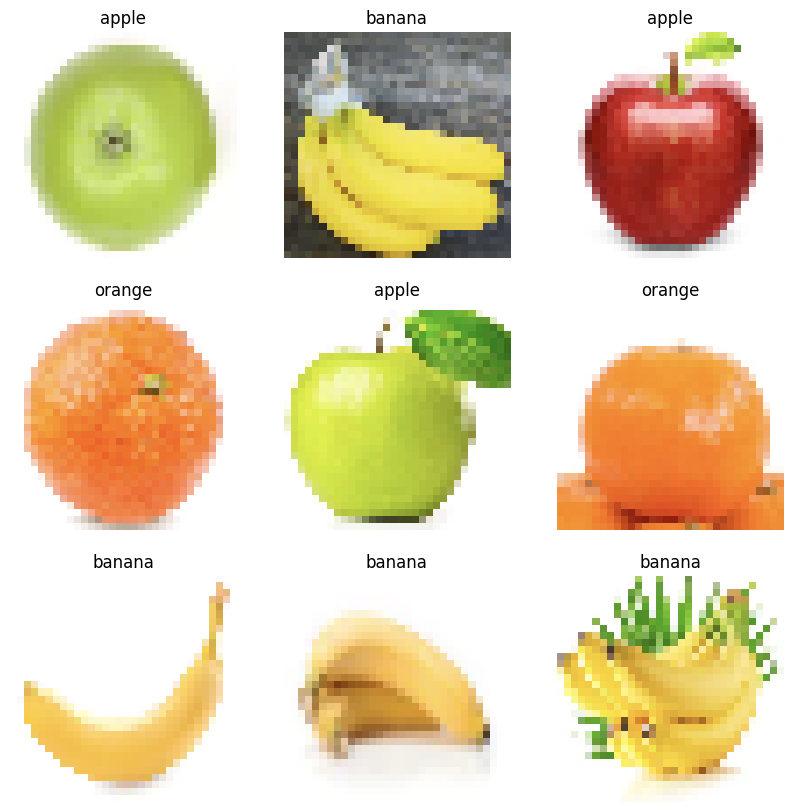

In [4]:
class_names=["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

model=Sequential([
    Rescaling(1./255),
    
    Conv2D(32, 3, activation="relu"),
    MaxPooling2D(),
    
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(),
    
    Conv2D(128, 3, activation="relu"),
    MaxPooling2D(),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dense(3, activation="softmax")
     
])


In [6]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [7]:
model.fit(train_ds,validation_data=val_ds, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4235 - loss: 1.1267 - val_accuracy: 0.6818 - val_loss: 0.8184
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7052 - loss: 0.7025 - val_accuracy: 0.9091 - val_loss: 0.3964
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7907 - loss: 0.4722 - val_accuracy: 0.7879 - val_loss: 0.4559
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8784 - loss: 0.2722 - val_accuracy: 0.9697 - val_loss: 0.1245
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8937 - loss: 0.2777 - val_accuracy: 0.9545 - val_loss: 0.1830
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9640 - loss: 0.1427 - val_accuracy: 0.8636 - val_loss: 0.3963
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9044 - loss: 0.2385 - val_accuracy: 0.9394 - val_loss: 0.1705
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9619 - loss: 0.0958 - val_accuracy: 0.8485 - v

In [8]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9593 - loss: 0.1304


[0.12436315417289734, 0.9615384340286255]

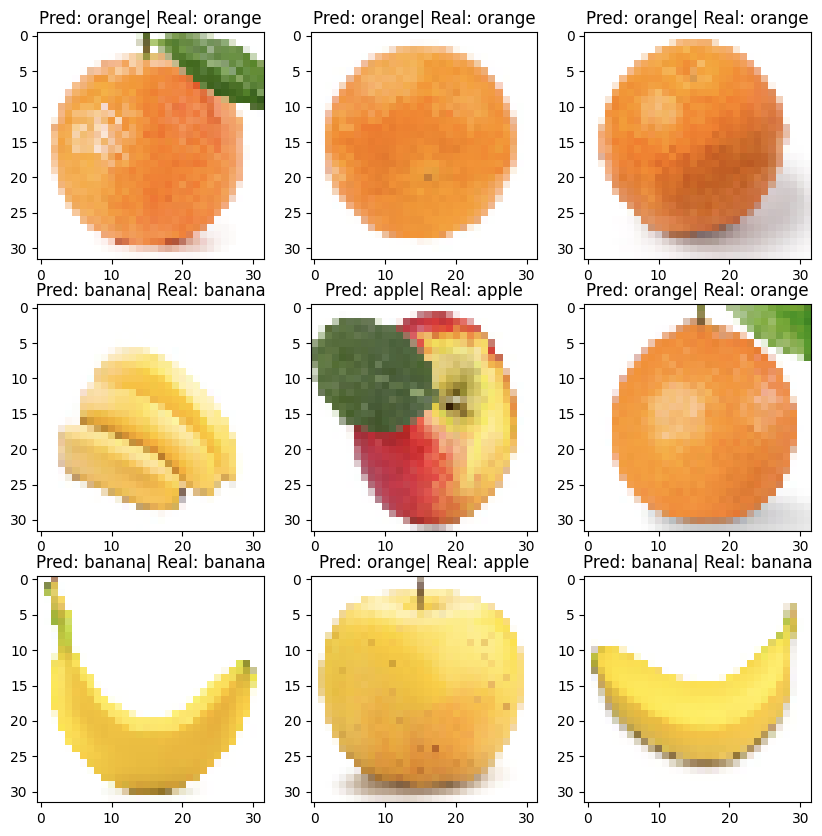

In [9]:
import numpy 

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications=model(images)
    
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index=numpy.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + "| Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\abhin\AppData\Local\Temp\tmpoh8wgopi\assets


INFO:tensorflow:Assets written to: C:\Users\abhin\AppData\Local\Temp\tmpoh8wgopi\assets


: 

In [ ]:
# This model is unable to convert in local system. So please use Google Colab